# Chapter 6: Multiple Linear Regression

In [43]:
## Import required packages
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [44]:
# table 6.3 - Reduce data frame to the top 1000 rows and select columns for regression analysis
car_df = pd.read_csv('ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]
car_df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,502.538000,11860.796000,48.034000,5.486000,2000.290000,62669.429000,102.188000,0.68300,0.048000,1590.180000,4.083000,4.0,5.036000,90.160000,1079.156000,0.454000,0.896000,3.949000,0.93900,0.981000,0.834000,0.608000,0.078000,0.423000,0.291000,0.629000,0.614000,0.983000,0.158000,0.30600,0.288000,0.798000,0.224000,0.157000,0.004000,0.245000
std,289.858781,3748.829864,16.696215,3.299195,1.383407,35414.796253,15.571484,0.46554,0.213873,492.203496,0.953425,0.0,0.216219,43.589063,58.123851,0.498129,0.305413,3.413803,0.23945,0.136593,0.372267,0.488441,0.268306,0.494283,0.454451,0.483314,0.487074,0.129336,0.364924,0.46106,0.453058,0.401693,0.417131,0.363983,0.063151,0.430302
min,1.000000,4350.000000,1.000000,1.000000,1999.000000,1.000000,69.000000,0.00000,0.000000,1300.000000,2.000000,4.0,3.000000,19.000000,1000.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,251.750000,9450.000000,39.000000,3.000000,1999.000000,38924.000000,97.000000,0.00000,0.000000,1400.000000,3.000000,4.0,5.000000,69.000000,1045.000000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,502.500000,10900.000000,52.000000,5.000000,2000.000000,58288.500000,110.000000,1.00000,0.000000,1600.000000,4.000000,4.0,5.000000,85.000000,1075.000000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,753.250000,12950.000000,62.000000,8.000000,2001.000000,79446.250000,110.000000,1.00000,0.000000,1600.000000,5.000000,4.0,5.000000,85.000000,1100.000000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1004.000000,32500.000000,68.000000,12.000000,2004.000000,243000.000000,192.000000,1.00000,1.000000,16000.000000,5.000000,4.0,6.000000,283.000000,1615.000000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
#data types 
car_df.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [46]:
#PRINT SOME columns OF DATA 
pd.set_option('display.max_columns', None)
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0


In [47]:
#COUNT OF MISSING VALUES 
car_df.isnull().sum()

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

In [48]:
#another way to check to see if any values are missing
car_df.isnull().values.any()

False

In [49]:
# table 6.3 -  select columns for regression analysis

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price'

In [50]:
outcome

'Price'

In [51]:
predictors

['Age_08_04',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Automatic',
 'CC',
 'Doors',
 'Quarterly_Tax',
 'Weight']

In [52]:
# dummy variable creation
X = pd.get_dummies(car_df[predictors], drop_first=True)
y = car_df[outcome]

In [53]:
X

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,1,0,2000,3,210,1165,1,0
1,23,72937,90,1,0,2000,3,210,1165,1,0
2,24,41711,90,1,0,2000,3,210,1165,1,0
3,26,48000,90,0,0,2000,3,210,1165,1,0
4,30,38500,90,0,0,2000,3,210,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,68,42750,110,1,0,1600,3,69,1050,0,1
996,67,42102,110,1,0,1600,5,85,1075,0,1
997,63,41586,110,1,0,1600,5,19,1114,0,1
998,64,41200,110,0,0,1600,5,85,1070,0,1


In [54]:
list(X)

['Age_08_04',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'CC',
 'Doors',
 'Quarterly_Tax',
 'Weight',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol']

In [55]:
X.dtypes

Age_08_04           int64
KM                  int64
HP                  int64
Met_Color           int64
Automatic           int64
CC                  int64
Doors               int64
Quarterly_Tax       int64
Weight              int64
Fuel_Type_Diesel    uint8
Fuel_Type_Petrol    uint8
dtype: object

In [56]:
y

0      13500
1      13750
2      13950
3      14950
4      13750
       ...  
995     9950
996     9950
997     9950
998     9900
999    10950
Name: Price, Length: 1000, dtype: int64

In [57]:
# TRAINING AND VALIDATION - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [58]:
train_X

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
371,35,18000,110,1,0,1600,5,85,1075,0,1
45,23,84000,90,0,0,2000,5,234,1270,1,0
560,54,39291,110,1,0,1600,3,69,1040,0,1
748,61,81170,110,1,0,1600,4,69,1040,0,1
419,55,94122,86,1,0,1300,3,69,1015,0,1
...,...,...,...,...,...,...,...,...,...,...,...
767,57,78955,86,1,0,1300,5,69,1045,0,1
72,28,28817,110,1,0,1598,5,85,1130,0,1
908,66,58654,110,1,0,1600,5,85,1070,0,1
235,38,60829,110,1,0,1600,5,85,1075,0,1


In [59]:
train_X.describe()

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,47.973333,63322.488333,101.275000,0.686667,0.056667,1601.321667,4.083333,90.296667,1079.803333,0.130000,0.853333
std,16.685922,35940.452509,15.253759,0.464236,0.231397,618.818351,0.947568,44.808127,59.159116,0.336584,0.354068
min,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,3.000000,19.000000,1000.000000,0.000000,0.000000
25%,38.000000,38772.250000,97.000000,0.000000,0.000000,1400.000000,3.000000,69.000000,1040.000000,0.000000,1.000000
50%,53.000000,58813.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,85.000000,1075.000000,0.000000,1.000000
75%,62.000000,80305.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,85.000000,1105.000000,0.000000,1.000000
max,68.000000,216000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,283.000000,1615.000000,1.000000,1.000000


In [60]:
valid_X

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
507,55,54900,97,1,0,1400,5,85,1060,0,1
818,62,70500,110,1,0,1600,5,69,1035,0,1
452,49,73175,97,1,0,1400,3,69,1030,0,1
368,37,21500,110,1,0,1600,5,69,1030,0,1
242,43,58277,110,1,0,1600,3,69,1045,0,1
...,...,...,...,...,...,...,...,...,...,...,...
172,8,10077,97,1,0,1400,5,85,1110,0,1
554,49,40836,110,0,1,1600,3,85,1075,0,1
103,11,16123,110,1,0,1600,3,85,1105,0,1
754,68,80426,110,1,0,1600,3,85,1055,0,1


In [61]:
valid_X.describe()

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
count,400.000000,400.00000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,48.125000,61689.84000,103.557500,0.677500,0.03500,1573.467500,4.082500,89.955000,1078.185000,0.102500,0.887500
std,16.732133,34632.90829,15.957704,0.468019,0.18401,176.693791,0.963335,41.748297,56.594993,0.303685,0.316376
min,1.000000,1.00000,69.000000,0.000000,0.00000,1300.000000,2.000000,19.000000,1000.000000,0.000000,0.000000
25%,39.000000,38987.50000,97.000000,0.000000,0.00000,1400.000000,3.000000,69.000000,1045.000000,0.000000,1.000000
50%,52.000000,57520.00000,110.000000,1.000000,0.00000,1600.000000,5.000000,85.000000,1070.000000,0.000000,1.000000
75%,62.000000,77691.25000,110.000000,1.000000,0.00000,1600.000000,5.000000,85.000000,1100.000000,0.000000,1.000000
max,68.000000,243000.00000,192.000000,1.000000,1.00000,2000.000000,5.000000,283.000000,1480.000000,1.000000,1.000000


In [62]:
train_y

371    13995
45     19000
560    10950
748     8950
419     8950
       ...  
767     9500
72     18950
908     8250
235    11650
37     14950
Name: Price, Length: 600, dtype: int64

In [63]:
train_y.describe()

count      600.000000
mean     11777.811667
std       3700.119552
min       4450.000000
25%       9250.000000
50%      10900.000000
75%      12950.000000
max      32500.000000
Name: Price, dtype: float64

In [64]:
valid_y.describe()

count      400.000000
mean     11985.272500
std       3822.011861
min       4350.000000
25%       9537.500000
50%      10950.000000
75%      13300.000000
max      31275.000000
Name: Price, dtype: float64

In [65]:
#fit regression model
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

LinearRegression()

In [66]:
# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X))

intercept  -1319.3543800411808
           Predictor  coefficient
0          Age_08_04  -140.748761
1                 KM    -0.017840
2                 HP    36.103419
3          Met_Color    84.281830
4          Automatic   416.781954
5                 CC     0.017737
6              Doors   -50.657863
7      Quarterly_Tax    13.625325
8             Weight    13.038711
9   Fuel_Type_Diesel  1066.464681
10  Fuel_Type_Petrol  2310.249543

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


In [67]:
pred_y = car_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.8537958550253093
AIC :  10422.298278332171
BIC :  10479.45836384998


In [68]:
pred_y

array([14749.08137805, 17790.30153094, 11121.97691988,  9338.95208004,
        8805.26667306,  6074.14793002,  7510.189551  , 20741.62998178,
       15042.64640549, 14839.42220166,  8710.2733979 ,  9397.61304618,
       18527.2171228 , 13634.14557755, 14360.89404505,  7351.87341188,
       10981.69999552,  8700.51495774,  9857.38434226,  9770.51620791,
       10158.36798938,  9677.34202816, 18675.48187109, 10426.67304277,
       11063.82353944, 13319.92615897, 12769.36058503, 16226.37508991,
        8314.22904014, 10468.05587926,  9558.71008045, 13702.95852007,
        9824.18236041, 11253.19396112,  9501.41082045,  8612.95467092,
       21290.97882888,  5903.06424365,  8753.7631272 ,  7326.23506849,
       19647.01951151, 13599.62864658,  7572.25788052, 11671.91594292,
       11151.48074307,  9792.1562201 , 17102.94291582, 15698.37869249,
       11830.51951264,  8015.30546918,  9053.91809631, 18896.20907176,
        8708.289497  ,  8220.61776724, 19097.32301965, 11010.36495229,
      

In [69]:
#table 6.4
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, car_lm_pred)

        Predicted  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660
929   9496.498212    9995   498.501788
262  12480.063217   13500  1019.936783
810   8834.146068    7950  -884.146068
318  12183.361282    9900 -2283.361282
49   19206.965683   21950  2743.034317
446  10987.498309   11950   962.501691
142  18501.527375   19950  1448.472625
968   9914.690947    9950    35.309053
345  13827.299932   14950  1122.700068
971   7966.732543   10495  2528.267457
133  17185.242041   15950 -1235.242041
104  19952.658062   19450  -502.658062
6    16570.609280   16900   329.390720
600  13739.409113   11250 -2489.409113
496  11267.513740   11750   482.486260

Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
        

In [70]:
#manual way 
new_df = pd.DataFrame(
    [[55,55000,97,1,0,1600,5,85,1000,0,1]],
    columns=['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel','Fuel_Type_Petrol'])
new_df

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,55,55000,97,1,0,1600,5,85,1000,0,1


In [71]:
car_lm_pred  = car_lm.predict(new_df)
print('Predicted value for median car price is:', car_lm_pred)

Predicted value for median car price is: [9826.77456004]


0.7425


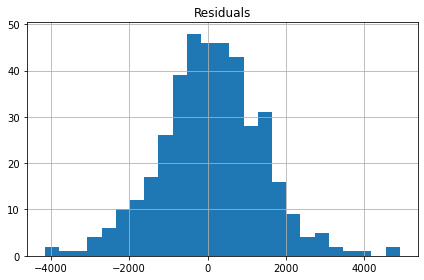

In [72]:
#figure 6.1
#determine residuals and create a histograM

car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.savefig("myexample.png")

In [73]:
#Correlation
# Create a new dataframe with predictors
predictors_df = X
predictors_df.columns

Index(['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors',
       'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [74]:
import numpy as np
import seaborn as sns
corr = predictors_df.corr()
corr

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Age_08_04,1.000000,0.550858,-0.176269,-0.139372,-0.002980,-0.093984,-0.167445,-0.188490,-0.504819,-0.095690,0.081443
KM,0.550858,1.000000,-0.345250,-0.092474,-0.068041,0.073586,-0.059569,0.283486,-0.076834,0.389682,-0.426212
HP,-0.176269,-0.345250,1.000000,0.059873,0.054096,0.020641,0.068058,-0.297448,0.086617,-0.519189,0.474359
Met_Color,-0.139372,-0.092474,0.059873,1.000000,-0.027989,0.037447,0.106697,0.011233,0.070489,-0.008476,-0.001019
Automatic,-0.002980,-0.068041,0.054096,-0.027989,1.000000,0.121195,0.000079,-0.054082,0.075250,-0.082525,0.074170
CC,-0.093984,0.073586,0.020641,0.037447,0.121195,1.000000,0.073051,0.271509,0.287022,0.283342,-0.270993
Doors,-0.167445,-0.059569,0.068058,0.106697,0.000079,0.073051,1.000000,0.102143,0.275265,0.026326,-0.024602
Quarterly_Tax,-0.188490,0.283486,-0.297448,0.011233,-0.054082,0.271509,0.102143,1.000000,0.633912,0.807280,-0.845507
Weight,-0.504819,-0.076834,0.086617,0.070489,0.075250,0.287022,0.275265,0.633912,1.000000,0.562477,-0.549702
Fuel_Type_Diesel,-0.095690,0.389682,-0.519189,-0.008476,-0.082525,0.283342,0.026326,0.807280,0.562477,1.000000,-0.938359


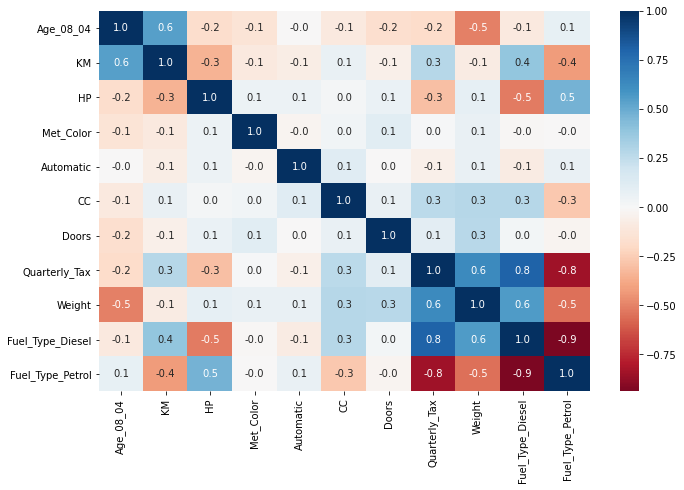

In [75]:
#heatmap using seaborn
#If the correlation between variables if greater than 0.7 we can say that the two variables are highly correlated. 
#From the above table, the pairs of highly correlated variables are:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.savefig("mycorr.png")

In [85]:
#table 6.5
#Run an exhaustive search. The Fuel type column is categorical and needs to be converted into dummy variables.
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj           AIC  Age_08_04  Automatic     CC  Doors  Fuel_Type_Diesel  \
0    1  0.767901  10689.712094       True      False  False  False             False   
1    2  0.801160  10597.910645       True      False  False  False             False   
2    3  0.829659  10506.084235       True      False  False  False             False   
3    4  0.846357  10445.174820       True      False  False  False             False   
4    5  0.849044  10435.578836       True      False  False  False             False   
5    6  0.853172  10419.932278       True      False  False  False             False   
6    7  0.853860  10418.104025       True      False  False  False              True   
7    8  0.854297  10417.290103       True       True  False  False              True   
8    9  0.854172  10418.789079       True       True  False   True              True   
9   10  0.854036  10420.330800       True       True  False   True              True   
10  11  0.853796  10422.298278  

In [86]:
#table 6.6 backward elimination
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove CC
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [78]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


In [87]:
# table 6.7 - forward selection 
#The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, add None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


In [88]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, unchanged None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']
